In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import seaborn as sns
from seaborn import scatterplot
from sklearn import neighbors
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metr
from sklearn import preprocessing
import math
import os
# import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from numpy import linalg as la
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import normalize
from sklearn.preprocessing import label_binarize

In [4]:
path = 'C:\\Users\\HP\\Desktop\\EE559\\HW34\\AReM'

In [5]:
def create_samples(path):
    filename_whole = []
    for filename in os.listdir(path):
        if ('.pdf' in filename) == False:
            filename_whole.append(filename)
    filename_whole.sort
    test = []
    train = []
    data = []
    for i in range(len(filename_whole)):
        path_1 = path + '\\' + filename_whole[i]
        if i <= 1:
            # print(path_1)
            filename1 = []
            for filename in os.listdir(path_1):
                filename1.append(filename)
            filename1.sort()
            for j in range(0, 2, 1):
                path1_1 = path_1 + '\\' + filename1[j]
                a = pd.read_csv(path1_1, sep=None, engine='python', skiprows=range(0, 4, 1))
                b = a.values
                test.append(b)
                data.append(b)
                # print(path1_1)
            for j in range(2, len(filename1), 1):
                if ((i == 1) & (j == 3)) == True:
                    path1_1 = path_1 + '\\' + filename1[j]
                    a = pd.read_csv(path1_1, sep=' ', engine='python', skiprows=range(0, 5, 1))
                    a = a.drop('Unnamed: 7', axis=1)
                    b = a.values
                    train.append(b)
                    data.append(b)
                    # print(path1_1)
                else:
                    path1_1 = path_1 + '\\' + filename1[j]
                    a = pd.read_csv(path1_1, sep=None, engine='python', skiprows=range(0, 4, 1))
                    b = a.values
                    train.append(b)
                    data.append(b)
                    # print(path1_1)
        else:
            # print(path_1)
            filename1 = []
            for filename in os.listdir(path_1):
                filename1.append(filename)
            filename1.sort()
            for j in range(0, 3, 1):
                path1_1 = path_1 + '\\' + 'dataset' + str(j + 1) + '.csv'
                # print(path1_1)

                a = pd.read_csv(path1_1, sep=None, engine='python', skiprows=range(0, 4, 1))
                b = a.values
                test.append(b)
                data.append(b)

            for j in range(3, len(filename1), 1):
                path1_1 = path_1 + '\\' + 'dataset' + str(j + 1) + '.csv'
                a = pd.read_csv(path1_1, sep=',', engine='python', skiprows=range(0, 4, 1), error_bad_lines=False)
                b = a.values
                train.append(b)
                data.append(b)
                # print(path1_1)

    # print(len(test))
    # print(len(train))
    # print(len(data))
    return test, train, data

In [6]:
def create_samples_multi(path):
    filename_whole = []
    for filename in os.listdir(path):
        if ('.pdf' in filename) == False:
            filename_whole.append(filename)
    filename_whole.sort
    test = []
    train = []
    data = []
    test_classes = []
    train_classes = []
    for i in range(len(filename_whole)):
        path_1 = path + '\\' + filename_whole[i]
        if i <= 1:
            # print(path_1)
            filename1 = []
            for filename in os.listdir(path_1):
                filename1.append(filename)
            filename1.sort()
            for j in range(0, 2, 1):
                path1_1 = path_1 + '\\' + filename1[j]
                a = pd.read_csv(path1_1, sep=None, engine='python', skiprows=range(0, 4, 1))
                b = a.values
                test.append(b)
                data.append(b)
                # print(path1_1)
                test_classes.append(filename_whole[i])
            for j in range(2, len(filename1), 1):
                if ((i == 1) & (j == 3)) == True:
                    path1_1 = path_1 + '\\' + filename1[j]
                    a = pd.read_csv(path1_1, sep=' ', engine='python', skiprows=range(0, 5, 1))
                    a = a.drop('Unnamed: 7', axis=1)
                    b = a.values
                    train.append(b)
                    data.append(b)
                    train_classes.append(filename_whole[i])
                    # print(path1_1)
                else:
                    path1_1 = path_1 + '\\' + filename1[j]
                    a = pd.read_csv(path1_1, sep=None, engine='python', skiprows=range(0, 4, 1))
                    b = a.values
                    train.append(b)
                    data.append(b)
                    train_classes.append(filename_whole[i])
                    # print(path1_1)
        else:
            # print(path_1)
            filename1 = []
            for filename in os.listdir(path_1):
                filename1.append(filename)
            filename1.sort()
            for j in range(0, 3, 1):
                path1_1 = path_1 + '\\' + 'dataset' + str(j + 1) + '.csv'
                # print(path1_1)

                a = pd.read_csv(path1_1, sep=None, engine='python', skiprows=range(0, 4, 1))
                b = a.values
                test.append(b)
                data.append(b)
                test_classes.append(filename_whole[i])

            for j in range(3, len(filename1), 1):
                path1_1 = path_1 + '\\' + 'dataset' + str(j + 1) + '.csv'
                a = pd.read_csv(path1_1, sep=',', engine='python', skiprows=range(0, 4, 1), error_bad_lines=False)
                b = a.values
                train.append(b)
                data.append(b)
                train_classes.append(filename_whole[i])
                # print(path1_1)
    return test, train, data, train_classes, test_classes

In [8]:
def c_1():
    print('There are a lot of features used in time series')
    print('like correlation structure, distribution，entropy，stationarity，scaling properties')
c_1()

There are a lot of features used in time series
like correlation structure, distribution，entropy，stationarity，scaling properties


In [10]:
def feature_extraction(data):
    aa = []
    for i in range(6):
        for j in range(8):
            if j == 1:
                aa.append('min_' + str(i + 1))
            elif j == 2:
                aa.append('max_' + str(i + 1))
            elif j == 3:
                aa.append('mean_' + str(i + 1))
            elif j == 4:
                aa.append('median_' + str(i + 1))
            elif j == 5:
                aa.append('standard deviation_' + str(i + 1))
            elif j == 6:
                aa.append('1st quart_' + str(i + 1))
            elif j == 7:
                aa.append('3rd quart_' + str(i + 1))
            else:
                pass

    result = pd.DataFrame(columns=aa)
    for k in range(88):
        bb = []
        for i in range(6):
            for j in range(7):
                if j == 0:
                    bb.append(np.min(data[k][:, i + 1]))
                elif j == 1:
                    bb.append(np.max(data[k][:, i + 1]))
                elif j == 2:
                    bb.append(np.mean(data[k][:, i + 1]))
                elif j == 3:
                    bb.append(np.median(data[k][:, i + 1]))
                elif j == 4:
                    bb.append(np.std(data[k][:, i + 1]))
                elif j == 5:
                    bb.append(np.percentile(data[k][:, i + 1], 25))
                elif j == 6:
                    bb.append(np.percentile(data[k][:, i + 1], 75))
                else:
                    pass
        result.loc[k] = bb
    print(result)
test_data, train_data, whole_data = create_samples(path)
feature_extraction(whole_data)

    min_1  max_1     mean_1  median_1  standard deviation_1  1st quart_1  \
0   37.25  45.00  40.624792    40.500              1.475428      39.2500   
1   38.00  45.67  42.812812    42.500              1.434054      42.0000   
2   35.00  47.40  43.954500    44.330              1.557210      43.0000   
3   33.00  47.75  42.179812    43.500              3.666840      39.1500   
4   33.00  45.75  41.678063    41.750              2.241152      41.3300   
5   37.00  48.00  43.454958    43.250              1.384653      42.5000   
6   36.25  48.00  43.969125    44.500              1.616677      43.3100   
7   12.75  51.00  24.562958    24.250              3.733619      23.1875   
8    0.00  42.75  27.464604    28.000              3.579847      25.5000   
9   21.00  50.00  32.586208    33.000              6.231642      26.1875   
10  27.50  33.00  29.876472    30.000              1.147607      29.0000   
11  19.00  45.50  30.938104    29.000              7.676137      26.7500   
12  25.00  4

(10, 69)


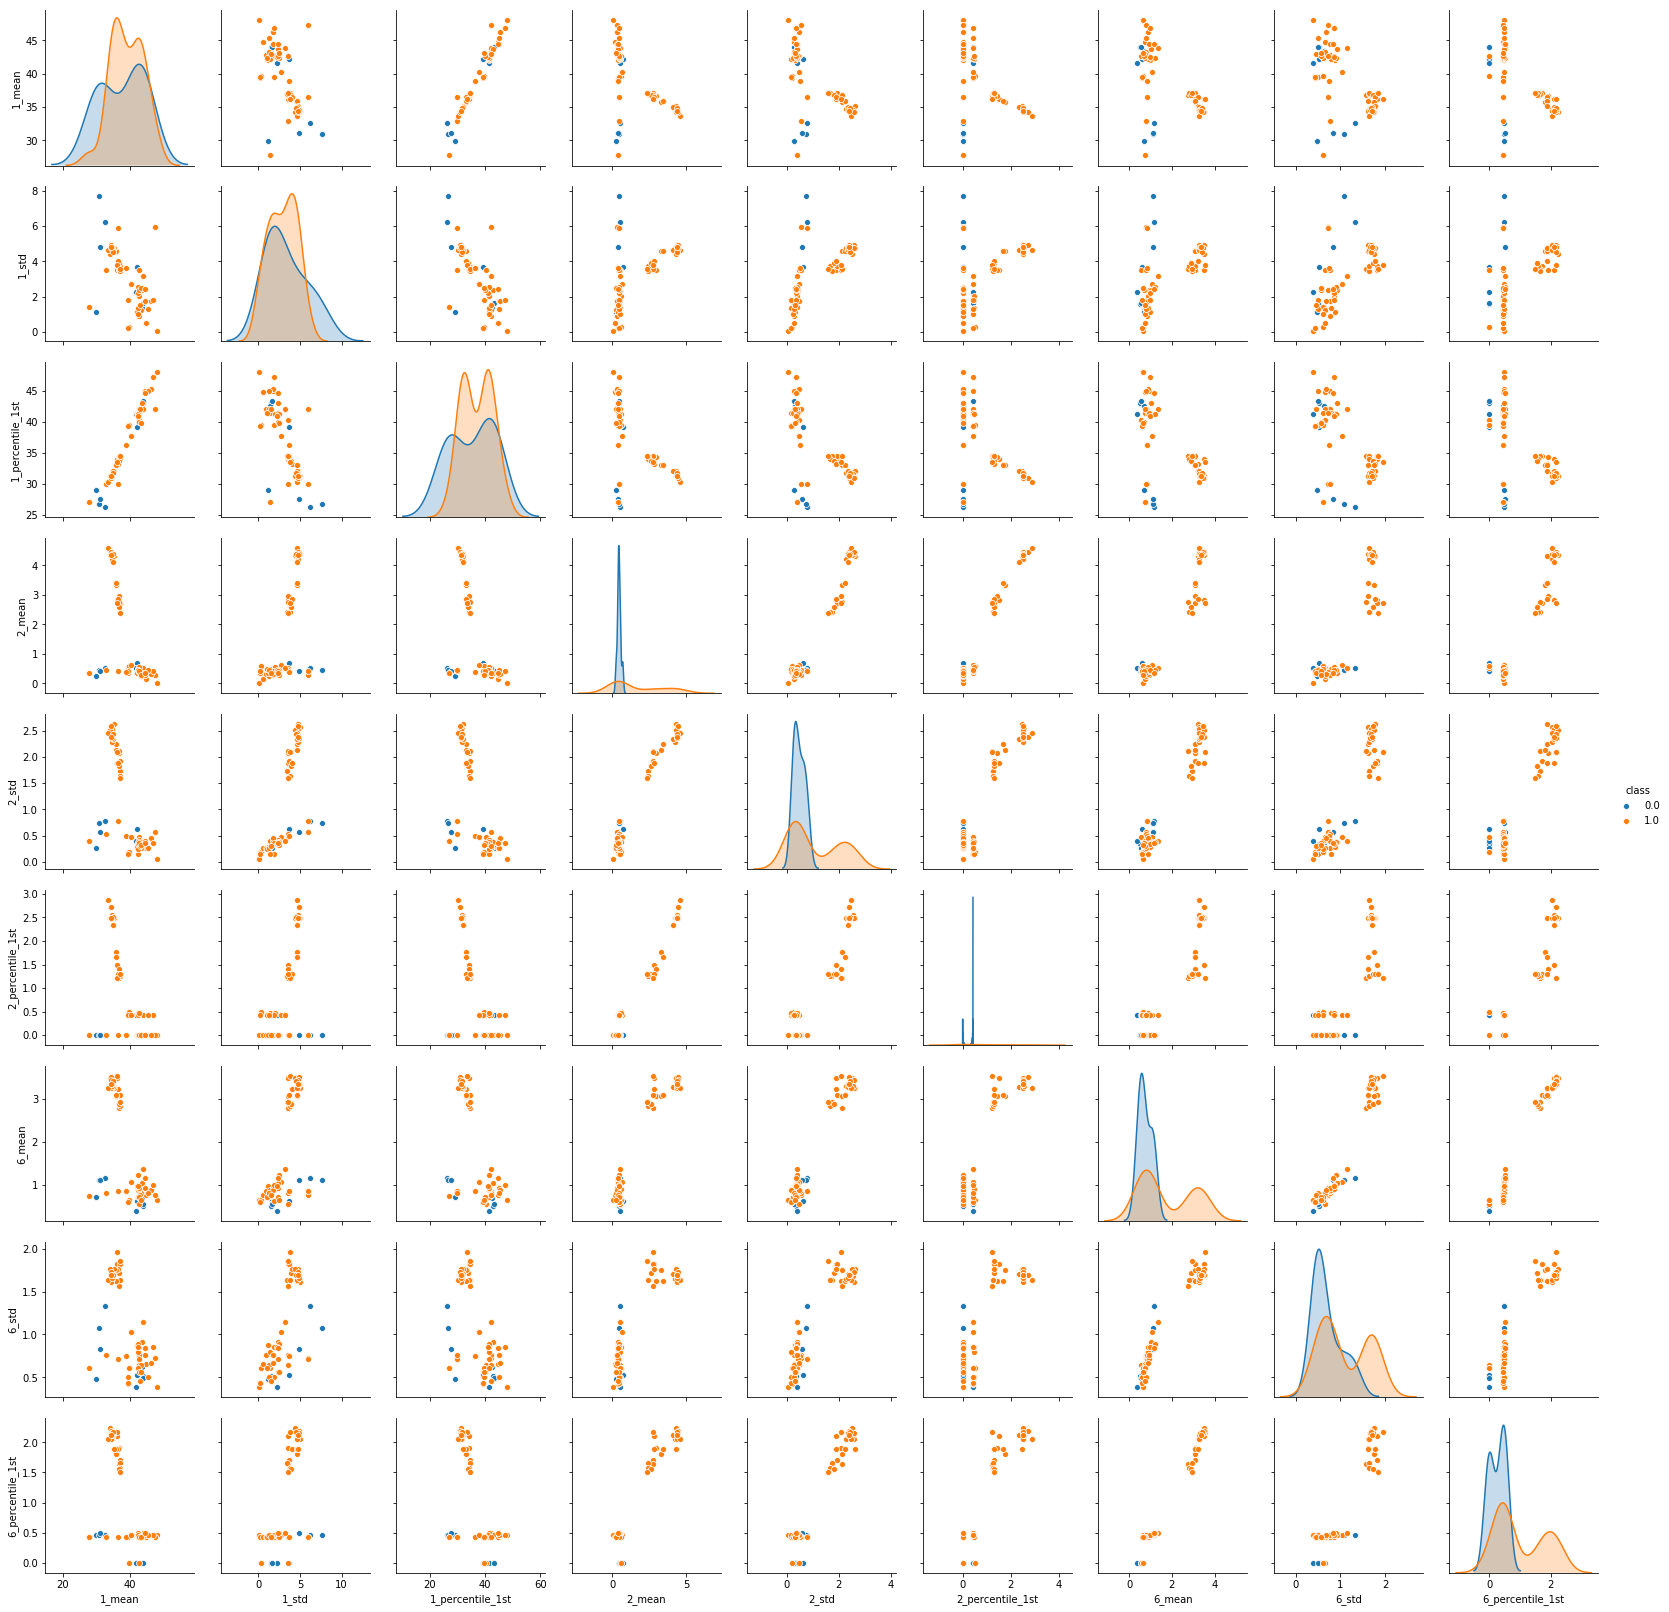

In [11]:
def d_1(train):
    data_list = []
    column_index = []
    for i in [1, 2, 6]:
        mean_1 = []
        std_1 = []
        percentile_1st_1 = []
        class_1 = []
        for j in range(9):
            mean = np.mean(train[j][:, i])
            std = np.std(train[j][:, i])
            percentile_1st = np.percentile(train[j][:, i], 25)
            mean_1.append(mean)
            std_1.append(std)
            percentile_1st_1.append(percentile_1st)
            class_1.append(0)
        for j in range(9, 69, 1):
            mean = np.mean(train[j][:, i])
            std = np.std(train[j][:, i])
            percentile_1st = np.percentile(train[j][:, i], 25)
            mean_1.append(mean)
            std_1.append(std)
            percentile_1st_1.append(percentile_1st)
            class_1.append(1)
        data_list.append(mean_1)
        data_list.append(std_1)
        data_list.append(percentile_1st_1)
        column_index.append(str(i) + '_mean')
        column_index.append(str(i) + '_std')
        column_index.append(str(i) + '_percentile_1st')
    data_list.append(class_1)
    column_index.append('class')
    data_result = np.array(data_list)
    print(data_result.shape)
    data_df = DataFrame(data_result.T, columns=column_index)
    sns.pairplot(data_df, hue='class',
                 vars=['1_mean', '1_std', '1_percentile_1st', '2_mean', '2_std', '2_percentile_1st', '6_mean', '6_std',
                       '6_percentile_1st'])

d_1(train_data)

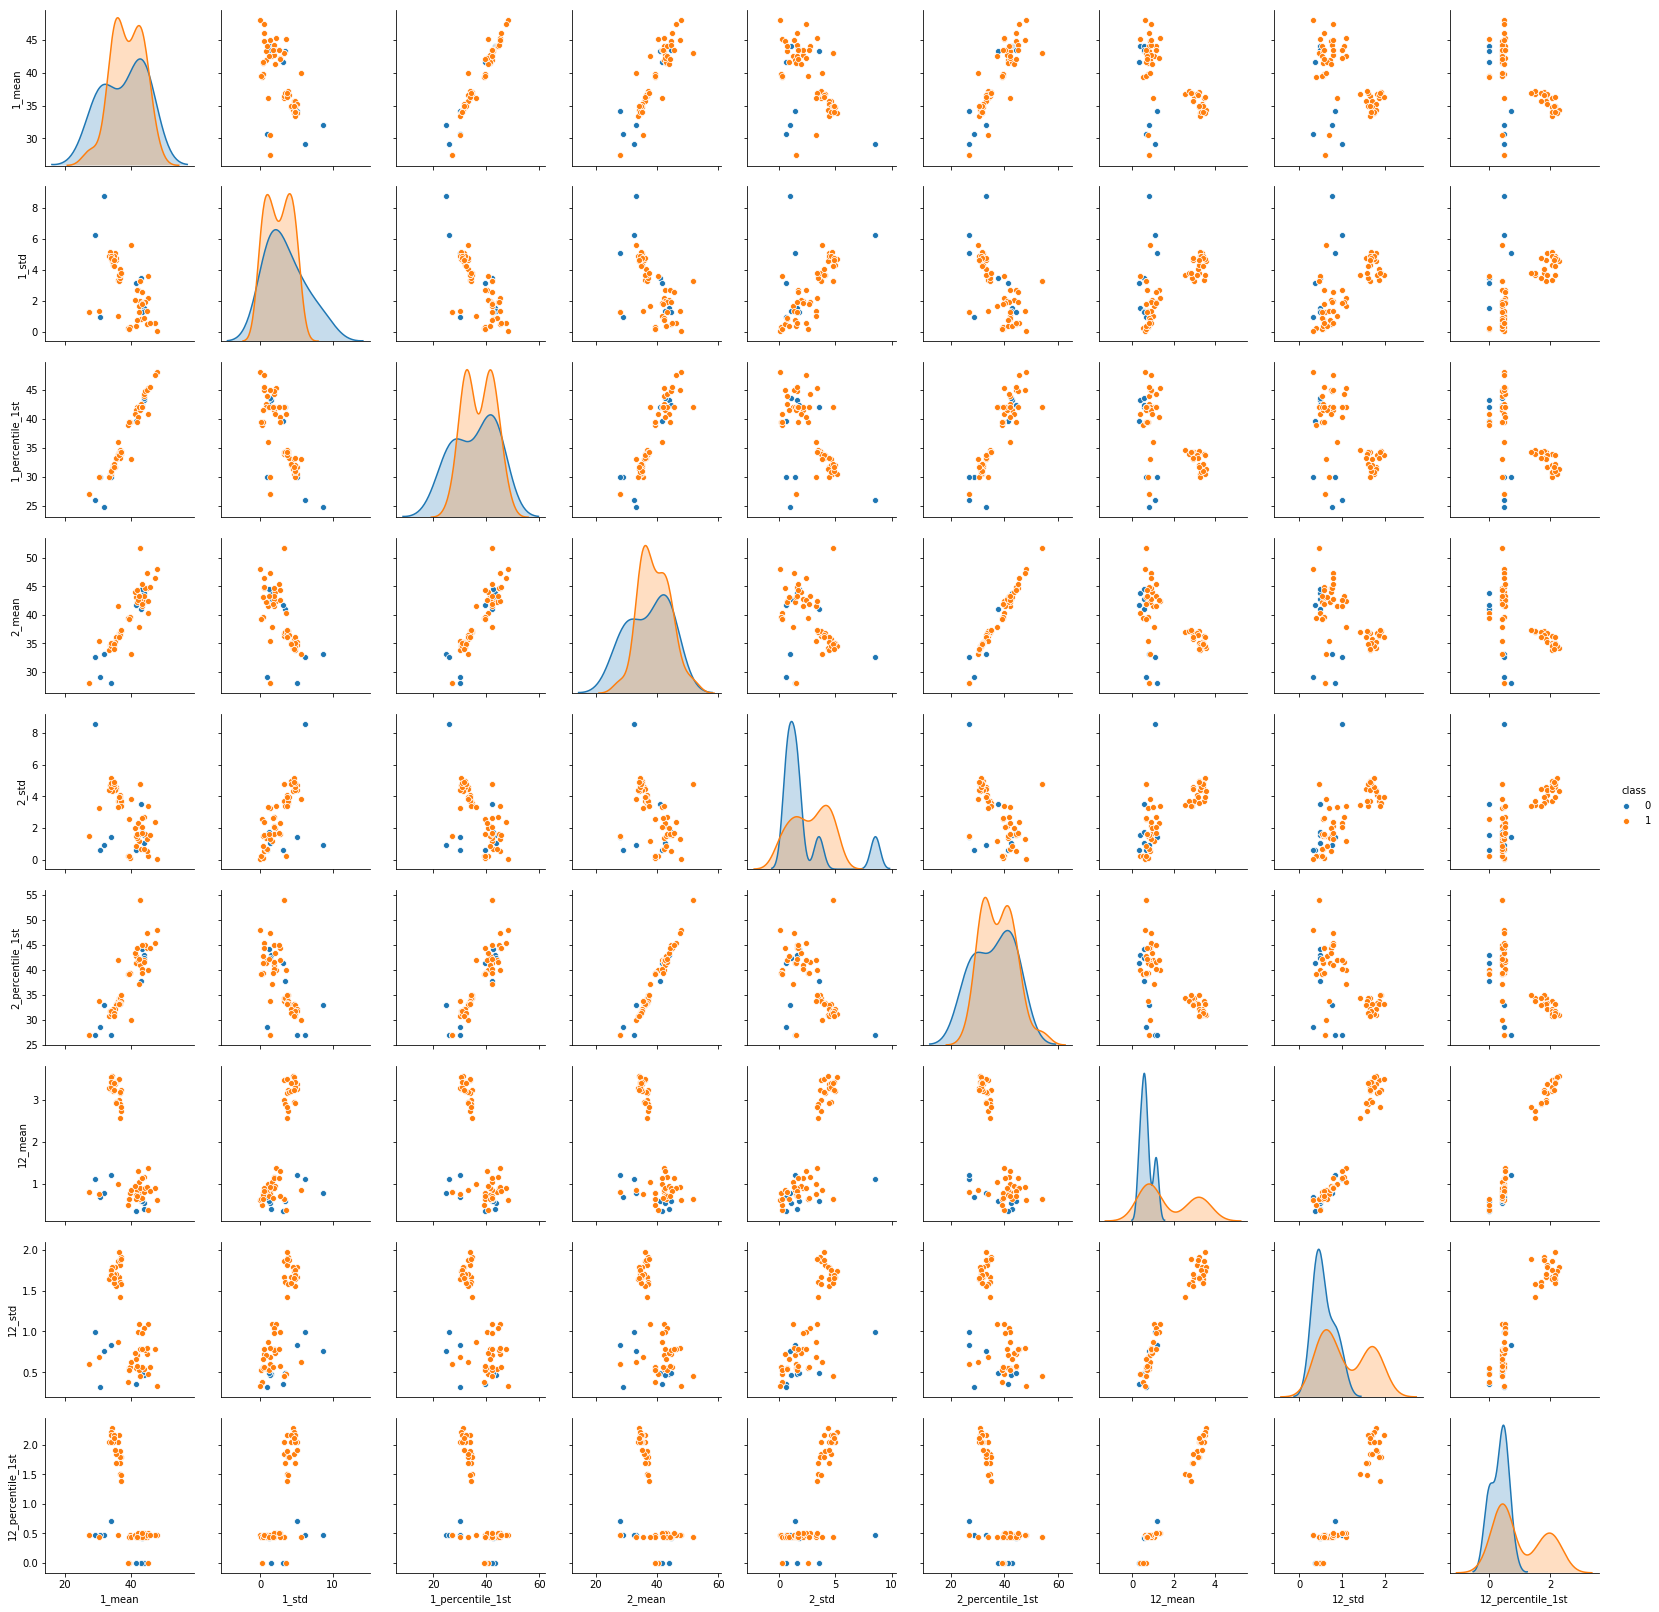

In [12]:
def d_2_1(train):
    piece = 240
    data_list = []
    column_index = []
    result = {}
    for i in [1, 6]:
        for k in range(2):
            mean_1 = []
            std_1 = []
            percentile_1st_1 = []
            class_1 = []

            for j in range(0, 69, 1):
                if j >= 9:
                    flag = 1
                else:
                    flag = 0
                if (((i == 6) & (k == 1)) == True):
                    mean = np.mean(train[j][k * piece:(k + 1) * piece, i])
                    std = np.std(train[j][k * piece:(k + 1) * piece, i])
                    percentile_1st = np.percentile(train[j][k * piece:(k + 1) * piece, i], 25)
                    mean_1.append(mean)
                    std_1.append(std)
                    percentile_1st_1.append(percentile_1st)
                    class_1.append(flag)
                elif i == 1:
                    mean = np.mean(train[j][k * piece:(k + 1) * piece, i])
                    std = np.std(train[j][k * piece:(k + 1) * piece, i])
                    percentile_1st = np.percentile(train[j][k * piece:(k + 1) * piece, i], 25)
                    mean_1.append(mean)
                    std_1.append(std)
                    percentile_1st_1.append(percentile_1st)
                    class_1.append(flag)
                else:
                    pass
            if (((i == 6) & (k == 1)) == True) | (i == 1):
                data_list.append(mean_1)
                data_list.append(std_1)
                data_list.append(percentile_1st_1)
            else:
                pass

    data_list.append(class_1)
    for i in [1, 2, 12]:
        column_index.append(str(i) + '_mean')
        column_index.append(str(i) + '_std')
        column_index.append(str(i) + '_percentile_1st')
    column_index.append('class')
    for i in range(10):
        result[column_index[i]] = data_list[i]
    data_df = DataFrame(result)
    sns.pairplot(data_df, hue='class',
                 vars=['1_mean', '1_std', '1_percentile_1st', '2_mean', '2_std', '2_percentile_1st', '12_mean',
                       '12_std', '12_percentile_1st'])
d_2_1(train_data)

d_2:
    Acutally, I think the second diagram shows more sparse data, especially in the margin.

In [16]:
def d_3_1(train, num, sep):
    piece = round(480 / num)
    results = {}
    if sep == 0:
        sep_1 = 9
    else:
        sep_1 = 4
    for i in [1, 2, 3, 4, 5, 6]:
        for k in range(num):
            mean_1 = []
            std_1 = []
            percentile_1st_1 = []
            class_1 = []
            for j in range(len(train)):  # 69 or...
                if j >= sep_1:
                    flag = 0
                else:
                    flag = 1
                if k == (num - 1):
                    num_1 = len(train[j][:, 1])
                    mean = np.mean(train[j][k * piece:num_1, i])
                    std = np.std(train[j][k * piece:num_1, i])
                    percentile_1st = np.max(train[j][k * piece:num_1, i])

                    # percentile_1st = np.percentile(train[j][k * piece:num_1, i], 75)
                    mean_1.append(mean)
                    std_1.append(std)
                    percentile_1st_1.append(percentile_1st)
                    class_1.append(flag)
                else:
                    mean = np.mean(train[j][k * piece:(k + 1) * piece, i])
                    std = np.std(train[j][k * piece:(k + 1) * piece, i])
                    percentile_1st = np.max(train[j][k * piece:(k + 1) * piece, i])

                    # percentile_1st = np.percentile(train[j][k * piece:(k + 1) * piece, i], 75)
                    mean_1.append(mean)
                    std_1.append(std)
                    percentile_1st_1.append(percentile_1st)
                    class_1.append(flag)
            results[str(i) + '_' + str(k + 1) + '_mean'] = mean_1
            results[str(i) + '_' + str(k + 1) + '_std'] = std_1
            results[str(i) + '_' + str(k + 1) + '_percentile_3st'] = percentile_1st_1
    results['class'] = class_1
    return results


def test_LogisticRegression(X_train, X_test, y_train, y_test):
    cls = LogisticRegression()
    results = cls.fit(X_train, y_train)
    scores = cls.score(X_test, y_test)
    return scores


def features_backward_selection(x_train, y_train, x_test, y_test):
    selected_features = []
    scores_result = []
    estimator = LogisticRegression()
    for i in range(1, len(x_train[:][0])):
        scores = []
        delete_column_1 = []
        selector = RFE(estimator, n_features_to_select=i)
        selector = selector.fit(x_train, y_train)
        delete_column = (selector.support_)
        for j in range(len(delete_column)):
            if delete_column[j] == True:
                delete_column_1.append(j)
            else:
                pass
        x_train_new = np.delete(x_train, delete_column_1, axis=1)
        x_test_new = np.delete(x_test, delete_column_1, axis=1)
        sfolder = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
        for train, test in sfolder.split(x_train_new, y_train):
            # x_train, y_train, x_test, y_test
            x_train_1 = np.delete(x_train_new, test, axis=0)
            x_test_1 = np.delete(x_train_new, train, axis=0)
            y_train_1 = np.delete(y_train, test, axis=0)
            y_test_1 = np.delete(y_train, train, axis=0)
            scores.append(test_LogisticRegression(x_train_1, x_test_1, y_train_1, y_test_1))
        scores_1 = np.mean(np.array(scores))
        scores_result.append(scores_1)
#     print(scores_result)
    bbb = np.argmax(np.array(scores_result))
    aaa = (np.array(scores_result))
    result_1 = len(x_train[:][0]) - (bbb + 1)
    result_2 = np.max(aaa)
    print('number of features selected is',result_1)
    print('best score is ',result_2)
    return result_1, result_2, x_train_new, x_test_new


def find_best():
    accuracy = []
    features = []
    x_train_new_1 = []
    x_test_new_1 = []
    l = range(1, 21, 1)
    test_data, train_data, whole_data = create_samples(path)
    for i in range(1, 21, 1):
        train = d_3_1(train_data, i, 0)
        train_2 = (DataFrame(train)).values
        x_train = np.delete(train_2, train_2.shape[1] - 1, axis=1)
        y_train = train_2[:, train_2.shape[1] - 1]

        test = d_3_1(test_data, i, 1)
        test_2 = (DataFrame(test)).values
        x_test = np.delete(test_2, test_2.shape[1] - 1, axis=1)
        y_test = test_2[:, test_2.shape[1] - 1]
        print('train shape is ',train_2.shape)

        result_1, result_2, x_train_new, x_test_new = features_backward_selection(x_train, y_train, x_test, y_test)
        accuracy.append(result_2)
        features.append(result_1)
        x_train_new_1.append(x_train_new)
        x_test_new_1.append(x_test_new)
    accuracy_index = (int)(np.argmax(np.array(accuracy)))
    best = (l[accuracy_index], features[accuracy_index])
    print(best)
    print('The best test score is %f' % (
        test_LogisticRegression(x_train_new_1[accuracy_index], x_test_new_1[accuracy_index], y_train, y_test)))
    print('the wrong way is that just assuming the number of predictors we should use, \n'
          'and then use cross validation to select the best l in this case.\n'
          'the right way is that using cross validation in both step 1 and 2, that is \n'
          'using CV to find the best number of predicators, and then usc CV to find \n'
          'the best number of l')
    return l[accuracy_index], features[accuracy_index]

l,num = find_best()

train shape is  (69, 19)
number of features selected is 17
best score is  0.9285714285714286
train shape is  (69, 37)
number of features selected is 34
best score is  0.9571428571428571
train shape is  (69, 55)
number of features selected is 53
best score is  0.9417582417582417
train shape is  (69, 73)
number of features selected is 70
best score is  0.9714285714285715
train shape is  (69, 91)
number of features selected is 89
best score is  0.9714285714285715
train shape is  (69, 109)
number of features selected is 107
best score is  0.9428571428571428
train shape is  (69, 127)
number of features selected is 125
best score is  0.9714285714285715
train shape is  (69, 145)
number of features selected is 143
best score is  0.9571428571428571
train shape is  (69, 163)
number of features selected is 161
best score is  0.9571428571428571
train shape is  (69, 181)
number of features selected is 179
best score is  0.9571428571428571
train shape is  (69, 199)
number of features selected is 197

(69, 73)
number of features selected is 70
best score is  0.9714285714285715
70 0.9714285714285715
[[7.44760624e-07 9.99999255e-01]
 [2.79879908e-06 9.99997201e-01]
 [1.39466596e-05 9.99986053e-01]
 [1.67392865e-02 9.83260714e-01]
 [3.76231412e-02 9.62376859e-01]
 [1.49449668e-03 9.98505503e-01]
 [4.56539797e-03 9.95434602e-01]
 [1.18298578e-02 9.88170142e-01]
 [3.28001482e-03 9.96719985e-01]
 [9.99968354e-01 3.16462400e-05]
 [9.99980173e-01 1.98274548e-05]
 [9.99966565e-01 3.34347282e-05]
 [9.99989151e-01 1.08494545e-05]
 [9.99948159e-01 5.18409100e-05]
 [9.99935660e-01 6.43396284e-05]
 [9.99831138e-01 1.68861679e-04]
 [9.99763066e-01 2.36933676e-04]
 [9.99934161e-01 6.58394335e-05]
 [9.99714372e-01 2.85628057e-04]
 [9.95991266e-01 4.00873447e-03]
 [9.98749234e-01 1.25076631e-03]
 [9.99999998e-01 2.32438010e-09]
 [9.99999967e-01 3.30587647e-08]
 [9.99982535e-01 1.74649941e-05]
 [9.99985649e-01 1.43512550e-05]
 [9.90069008e-01 9.93099217e-03]
 [9.99999051e-01 9.48748831e-07]
 [9.985424

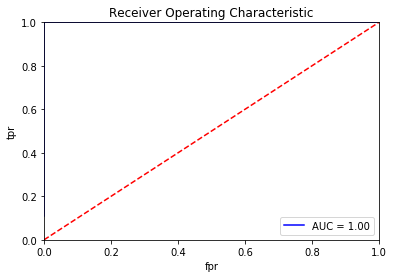

In [19]:
def dram_diagram(l):
    test_data, train_data, whole_data = create_samples(path)
    train = d_3_1(train_data, l, 0)
    train_2 = (DataFrame(train)).values
    x_train = np.delete(train_2, train_2.shape[1] - 1, axis=1)
    y_train = train_2[:, train_2.shape[1] - 1]

    test = d_3_1(test_data, l, 1)
    test_2 = (DataFrame(test)).values
    x_test = np.delete(test_2, test_2.shape[1] - 1, axis=1)
    y_test = test_2[:, test_2.shape[1] - 1]
    print(train_2.shape)
    result_1, result_2, x_train_new, x_test_new = features_backward_selection(x_train, y_train, x_test, y_test)
    print(result_1, result_2)

    classifier = LogisticRegression()
    classifier.fit(x_train, y_train)
    predic_train = classifier.predict(x_train)
    predic_test = classifier.predict(x_test)
    vc_matrix1 = confusion_matrix(y_train, predic_train)
    vc_matrix2 = confusion_matrix(y_test, predic_test)

    predictions = classifier.predict_proba(x_train)  # 每一类的概率.我的概率都是百分百了。。。auc也画不出来啊
    print(predictions)
    false_positive_rate, recall, thresholds = roc_curve(y_train, predictions[:, 1])
    roc_auc = auc(false_positive_rate, recall)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.ylabel('tpr')
    plt.xlabel('fpr')
    scores, pvalues = chi2(x_train, y_train)
    print('confusion matrix for train',vc_matrix1)
    print('confusion matrix for test',vc_matrix2)
    print('coefficient is ',classifier.coef_)
    print('interception is ',classifier.intercept_)
    print('p values is ', pvalues)
    test_score = classifier.score(x_test, y_test)
    print('The test score is',test_score)
    plt.show()
dram_diagram(l)

d_v:
    for the cross validation accuracy, the score is 0.9714285714285715, and the test score is 1.0

d_vi:
    That is true, my class have some kind of well-separated problem which causes instability. However, I can use some penalty to penalize them and I can have a good result. 

d_vii:
    There is no imbalanced classes, since the definition of imbalanced classes is that ratio of one number of one class to the other classes is going to zero.
    But in this question, the lowest ratio is 0.2, not zero.

In [20]:
def e_1():
    C_1 = []
    train_score_1 = []
    test_score_1 = []
    test_data, train_data, whole_data = create_samples(path)
    l_1 = range(1, 21, 1)
    for l in range(1, 21, 1):
        train = d_3_1(train_data, l, 0)
        train_2 = (DataFrame(train)).values
        x_train = np.delete(train_2, train_2.shape[1] - 1, axis=1)
        y_train = train_2[:, train_2.shape[1] - 1]

        test = d_3_1(test_data, l, 1)
        test_2 = (DataFrame(test)).values
        x_test = np.delete(test_2, test_2.shape[1] - 1, axis=1)
        y_test = test_2[:, test_2.shape[1] - 1]
        print(train_2.shape)

        train_set_x = normalize(x_train, axis=1)
        test_set_x = normalize(x_test, axis=1)
        cv = StratifiedKFold(n_splits=5)  # stratified method, 5 folds
        classifier_new = LogisticRegressionCV(scoring='accuracy', penalty='l1', solver='liblinear', cv=cv)
        classifier_new.fit(train_set_x, y_train)
        train_set_predic = classifier_new.predict(train_set_x)
        train_score = classifier_new.score(train_set_x, y_train)
        test_score = classifier_new.score(test_set_x, y_test)
        C = classifier_new.C_
        C_1.append(C)
        train_score_1.append(train_score)
        print(train_score)
        print(test_score)
        test_score_1.append(test_score)

    num = (int)(np.argmax(np.array(test_score_1)))
    print('The best C is ', C_1[num])
    print('The bset test accuracy is ', test_score_1[num])
    print('The best l is ', l_1[num])

e_1()

(69, 19)
0.9855072463768116
1.0
(69, 37)
1.0
0.9473684210526315
(69, 55)
1.0
0.9473684210526315
(69, 73)
0.9855072463768116
0.9473684210526315
(69, 91)
1.0
0.9473684210526315
(69, 109)
1.0
0.9473684210526315
(69, 127)
1.0
0.9473684210526315
(69, 145)
1.0
1.0
(69, 163)
1.0
0.9473684210526315
(69, 181)
1.0
1.0
(69, 199)
1.0
0.9473684210526315
(69, 217)
1.0
0.9473684210526315
(69, 235)
0.9855072463768116
0.9473684210526315
(69, 253)
0.9855072463768116
0.9473684210526315
(69, 271)
1.0
0.9473684210526315
(69, 289)
1.0
0.9473684210526315
(69, 307)
1.0
0.9473684210526315
(69, 325)
0.9855072463768116
0.9473684210526315
(69, 343)
0.9855072463768116
0.9473684210526315
(69, 361)
1.0
1.0
The best C is  [21.5443469]
The bset test accuracy is  1.0
The best l is  1


e_ii:
    The method in L1 penalized logistic regresstion is better, since it is very quick to see the results, and the test score is up to 1, it is very high actually.

In [33]:
def f_1(classifier_name='LogisticRegression'):
    C_1 = []
    train_score_1 = []
    test_score_1 = []
    test_sample = []
    train_sample = []
    l_1 = range(1, 21, 1)
    test_data, train_data, whole_data, y_train, y_test = create_samples_multi(path)
    activity = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
    for l in range(1, 21, 1):
        train = d_3_1(train_data, l, 0)
        train_2 = (DataFrame(train)).values
        x_train_1 = np.delete(train_2, train_2.shape[1] - 1, axis=1)

        test = d_3_1(test_data, l, 1)
        test_2 = (DataFrame(test)).values
        x_test_1 = np.delete(test_2, test_2.shape[1] - 1, axis=1)
        cv = StratifiedKFold(n_splits=5)  # stratified method, 5 folds
        test_sample.append(x_test_1)
        train_sample.append(x_train_1)

        if classifier_name == 'LogisticRegression':
            classifier = LogisticRegressionCV(solver='liblinear', penalty='l1', multi_class='ovr', cv=cv)
            x_train_1 = normalize(x_train_1)
            x_test_1 = normalize(x_test_1)
        elif classifier_name == 'GaussianNB':
            classifier = GaussianNB()
        elif classifier_name == 'MultinomialNB':
            classifier = MultinomialNB()
        else:
            pass

        classifier.fit(x_train_1, y_train)
        train_set_predic = classifier.predict(x_train_1)
        test_set_predic = classifier.predict(x_test_1)
        vc_matrix_test = confusion_matrix(y_test, test_set_predic)
        vc_matrix_train = confusion_matrix(y_test, test_set_predic)

        test_score = classifier.score(x_test_1, y_test)

        test_error = 1 - classifier.score(x_test_1, y_test)
        print('Test error = ' + str(test_error))
        test_score_1.append(test_error)


    Num = (int)(np.argmin(test_score_1))
    plt.figure()
    xdata = dict()
    ydata = dict()
    x_train_1 = train_sample[Num]
    x_test_1 = test_sample[Num]
    print('The lowest test error is ', test_score_1[Num])
    print('The best l is ', l_1[Num])

    if classifier_name == 'LogisticRegression':
        classifier = LogisticRegressionCV(solver='liblinear', penalty='l1', multi_class='ovr', cv=cv)
        x_train_1 = normalize(x_train_1)
        x_test_1 = normalize(x_test_1)
    elif classifier_name == 'GaussianNB':
        classifier = GaussianNB()
    elif classifier_name == 'MultinomialNB':
        classifier = MultinomialNB()
    else:
        pass
    classifier.fit(x_train_1, y_train)
    test_score = classifier.predict_proba(x_test_1)
    train_set_predic = classifier.predict(x_train_1)

    test_set_predic = classifier.predict(x_test_1)
    vc_matrix_test = confusion_matrix(y_train , train_set_predic)
    vc_matrix_train = confusion_matrix(y_test, test_set_predic)
    
    print('Following is the confusion matrix of test: ')
    print(vc_matrix_test)
    print('Following is the confusion matrix of train: ')
    print(vc_matrix_train)

    auc_var = dict()
    test_set_y = label_binarize(y_test, classes=activity)
    for i in range(0, 7):
        res = roc_curve(test_set_y[:, i], test_score[:, i])
        xdata[i] = res[0]
        ydata[i] = res[1]
        auc_var[i] = auc(res[0], res[1])
        plt.plot(res[0], res[1], lw=2, label=activity[i] + 'AUC = ' + str(auc_var[i]))
    plt.legend(loc='lower right')
    plt.xlabel('FPR')
    plt.ylabel('TPR')



D:\G\Anaconda3_python3.6\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Test error = 0.368421052631579
Test error = 0.368421052631579
Test error = 0.3157894736842105
Test error = 0.21052631578947367
Test error = 0.368421052631579
Test error = 0.26315789473684215
Test error = 0.3157894736842105
Test error = 0.1578947368421053
Test error = 0.26315789473684215
Test error = 0.3157894736842105
Test error = 0.3157894736842105
Test error = 0.3157894736842105
Test error = 0.368421052631579
Test error = 0.368421052631579
Test error = 0.3157894736842105
Test error = 0.5263157894736843
Test error = 0.4736842105263158
Test error = 0.368421052631579
Test error = 0.42105263157894735
Test error = 0.42105263157894735
The lowest test error is  0.1578947368421053
The best l is  8
Following is the confusion matrix of test: 
[[ 5  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0 12]]
Following is the confusion matrix of train: 
[[2 0 0 0 0 0 0]
 [1 0 1 0 0 0 0]
 [0 0 3

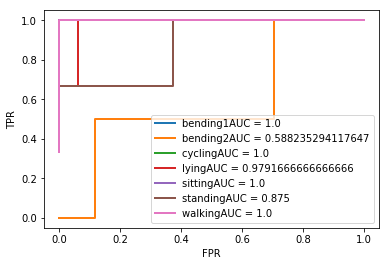

In [34]:
f_1(classifier_name='LogisticRegression')
plt.show()

Test error = 0.10526315789473684
Test error = 0.052631578947368474
Test error = 0.10526315789473684
Test error = 0.10526315789473684
Test error = 0.1578947368421053
Test error = 0.1578947368421053
Test error = 0.21052631578947367
Test error = 0.1578947368421053
Test error = 0.1578947368421053
Test error = 0.1578947368421053
Test error = 0.21052631578947367
Test error = 0.26315789473684215
Test error = 0.3157894736842105
Test error = 0.1578947368421053
Test error = 0.26315789473684215
Test error = 0.21052631578947367
Test error = 0.21052631578947367
Test error = 0.26315789473684215
Test error = 0.21052631578947367
Test error = 0.26315789473684215
The lowest test error is  0.052631578947368474
The best l is  2
Following is the confusion matrix of test: 
[[ 5  0  0  0  0  0  0]
 [ 0  3  0  1  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0 12]]
Following is the confusion matrix of train: 
[[2 0 0 0 0 0 0]
 [0 2 0

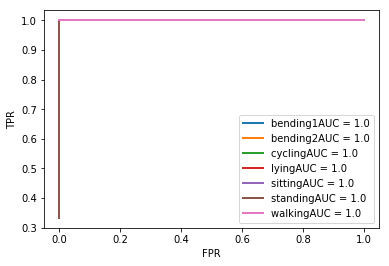

In [35]:
f_1(classifier_name='GaussianNB')
plt.show()

Test error = 0.10526315789473684
Test error = 0.21052631578947367
Test error = 0.21052631578947367
Test error = 0.1578947368421053
Test error = 0.1578947368421053
Test error = 0.1578947368421053
Test error = 0.1578947368421053
Test error = 0.1578947368421053
Test error = 0.21052631578947367
Test error = 0.21052631578947367
Test error = 0.052631578947368474
Test error = 0.1578947368421053
Test error = 0.1578947368421053
Test error = 0.21052631578947367
Test error = 0.1578947368421053
Test error = 0.1578947368421053
Test error = 0.10526315789473684
Test error = 0.10526315789473684
Test error = 0.10526315789473684
Test error = 0.10526315789473684
The lowest test error is  0.052631578947368474
The best l is  11
Following is the confusion matrix of test: 
[[ 5  0  0  0  0  0  0]
 [ 1  3  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  1 11  0]
 [ 0  0  0  0  0  0 12]]
Following is the confusion matrix of train: 
[[2 0 0 0 0 0 0]
 [0 2 0 

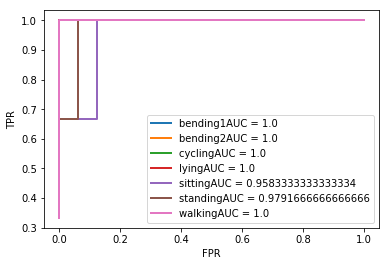

In [36]:
f_1(classifier_name='MultinomialNB')
plt.show()

f_iii:
    The best two is Multinomial priors and Gaussian, since its test error is same.